In [1]:
#from sunpy.net import hek
#from sunpy.net import hek2vso
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib qt
import shapely
from shapely.wkt import dumps, loads
import numpy as np
import pandas as pd
from shapely.geometry.polygon import LinearRing, Polygon
from datetime import timedelta
import datetime
#from sunpy.time import *
from dateutil.parser import parse
import matplotlib.cm as cm
import matplotlib as mpl
from operator import itemgetter
from itertools import groupby
import itertools
import operator
from datetime import timedelta
import csv
import dateutil
import time 
import scipy.stats as stats

# GET THE GOOD TRACKS FOR 2012
These are the ones that Ashna hand checked and determined were good

In [2]:
#TODO:It appears Ashna only used half of the track length to do her calculations
#You should probably do the same thing for consistency. Use only the first half of the filaments in each track.
url_non = '/Users/ashnaaggarwal/Documents/Filament_Tracking/Filament_tracking/NonEruptingTracks_List_2012_2013.csv'
track_files = pd.read_csv(url_non)
good_tracks_trans_draft = track_files['NonTrackNo'].values.tolist()
good_tracks_trans = []
for item in good_tracks_trans_draft:
    x=str(item).replace('[','').replace(']','')
    good_tracks_trans.append(float(x))
print len(good_tracks_trans)
#track_files.keys()

1492


In [3]:
fi_tracked_2012_2013 = pd.read_csv('FIDustinTracked24Mo.txt',delimiter='\t')
fi_tracked_2012_2013.head()
tracks=fi_tracked_2012_2013['Track No.']
good_tracks = fi_tracked_2012_2013.groupby('Track No.').filter(lambda x: len(x['Track No.']) >= 3, dropna=False) 

In [4]:
#print(groups.apply(lambda g: g[g['B'] == g['B'].max()]))
#print len(good_tracks2012)
#good_tracks2012.head()
#good_tracks2012['index_test'] = good_tracks2012.index

#grouped = fi_tracked2012.groupby('Track No.')
#bad = []
#for i, group in grouped:
    #bad.append(group.index.max())
    #print max(grouped['HEK_time'])
#print len(bad)

#print good_tracks2012[good_tracks2012.index == 6073]
#print bad
#good_tracks2012.drop(good_tracks2012.index[[1,2,3,4]])
#print bad
#print good_tracks2012[good_tracks2012.index == 4]
#for i in bad:
#    good_tracks2012 = fi_tracked2012[fi_tracked2012['index_test'] != i]
#good_tracks2012 = fi_tracked2012.drop(fi_tracked2012.index[[bad]])
#grouped = good_tracks2012.groupby('Track No.')
#for i, group in grouped: 
#    print len(group)
#lengths = 7,5,4,6
#good_tracks2012 = good_tracks2012.groupby('Track No.').filter(lambda x: len(x['Track No.']) >= 3, dropna=True)
#good_tracks2012[0:8]

In [5]:
###selects the data of interest by csv track numbers 


working_data_2012_2013_trans= good_tracks[good_tracks['Track No.'].isin(good_tracks_trans)]
working_data_2012_2013_trans.head()


,Track No.,HEK_time,next_time,Type,HPC_Center,HPC_BB_Rec,HPC_BB_Poly,HGS_Center,HGS_BB_Rec,HPC_BB_Poly.1,frm_specificid,fi_length,fi_lengthunit,fi_tilt,fi_barbstot,fi_barbsr,fi_barbsl,fi_chirality,Unnamed: 18
129,45,2012-01-04 18:11:55,2012-01-05 18:32:45,FI,POINT(-671.085022 584.557983),"POLYGON((-693.219421 543.307007,-653.980591 54...","POLYGON((-671.080017 553.369995,-669.070007 55...",POINT(-56.9113884 34.9468346),"POLYGON((-56.7332993 31.9662323,-51.8539772 31...","POLYGON((-54.5594215 32.5676842,-54.5103569 32...",NaN,4520415700,cm,-81.6418,1,1,0,0,NaN
130,45,2012-01-05 18:32:45,2012-01-06 18:05:45,FI,POINT(-543.301025 571.471985),"POLYGON((-584.552307 518.148499,-508.087708 51...","POLYGON((-536.26001 528.210022,-533.23999 528....",POINT(-41.5810432 33.1727524),"POLYGON((-43.3572731 29.4785118,-36.5029297 29...","POLYGON((-39.2724152 30.0013561,-39.0032806 29...",NaN,8610285600,cm,-70.9874,2,1,1,0,NaN
131,45,2012-01-06 18:05:45,2012-01-07 09:33:12,FI,POINT(-432.623993 643.906006),"POLYGON((-467.837585 587.564514,-397.4104 587....","POLYGON((-422.559998 597.630005,-419.540009 59...",POINT(-34.2653656 38.2233429),"POLYGON((-35.2295761 33.9975739,-29.2520638 33...","POLYGON((-31.6517277 34.6056404,-31.4598179 34...",NaN,7533991400,cm,14.4374,2,0,2,1,NaN
132,45,2012-01-07 09:33:12,2012-01-08 08:28:28,FI,POINT(-336.035004 639.875),"POLYGON((-364.205597 620.759033,-307.86441 620...","POLYGON((-330 630.820007,-326.980011 630.82000...",POINT(-25.6712666 37.5490799),"POLYGON((-27.4467411 36.1367683,-22.8855743 36...","POLYGON((-24.9201241 36.8269691,-24.6740513 36...",NaN,2941852670,cm,-25.8508,0,0,0,0,NaN
133,45,2012-01-08 08:28:28,2012-01-09 11:08:54,FI,POINT(-180.089005 648.922974),"POLYGON((-212.283356 622.764832,-154.936646 62...","POLYGON((-177.070007 632.830017,-175.059998 63...",POINT(-13.4799118 37.8649864),"POLYGON((-15.5282822 35.8817177,-11.2565479 35...","POLYGON((-13.0256424 36.6070557,-12.9013596 36...",NaN,3444121090,cm,-33.1219,3,2,1,0,NaN


# SPLIT BETWEEN NORTH AND SOUTH 

In [6]:
xvals = [loads(elem).x for elem in working_data_2012_2013_trans['HPC_Center']]
working_data_2012_2013_trans['xcen'] = xvals
#print len(working_data_2012_trans)
yvals = [loads(elem).y for elem in working_data_2012_2013_trans['HPC_Center']]
working_data_2012_2013_trans['ycen'] = yvals 


#The AVERAGE y value in the track is in the north. 
#There are a few cases where the filament track has values in both the north and south
north_filaments_2012_2013 = working_data_2012_2013_trans.groupby("Track No.").filter(lambda x: (x['ycen']).mean() > 0)
south_filaments_2012_2013 = working_data_2012_2013_trans.groupby("Track No.").filter(lambda x: (x['ycen']).mean() <= 0)


#Now group everything by its track number
south_groups_2012_2013 = south_filaments_2012_2013.groupby("Track No.")
north_groups_2012_2013 = north_filaments_2012_2013.groupby("Track No.")


#Get the unique track numbers for each hemisphere
north_trx_2012_2013_trans=north_groups_2012_2013['Track No.']
south_trx_2012_2013_trans=south_groups_2012_2013['Track No.']


/Users/ashnaaggarwal/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/ashnaaggarwal/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# FIND THE AREA OF THE POLYGONS

In [7]:
#Find the L to W using the bounding box rectangle.
rec_2012_2013 = working_data_2012_2013_trans['HPC_BB_Rec']
L_to_W_2012_2013 = []


for item in rec_2012_2013:
    rec = loads(item) #loading each polygon
    #the bounds gives [xmin, ymin, xmax, ymax]
    L_to_W_2012_2013.append((rec.bounds[2]-rec.bounds[0])/ (rec.bounds[3]-rec.bounds[1]))
    
working_data_2012_2013_trans['L_to_W'] = L_to_W_2012_2013
working_data_2012_2013_trans.tail()

/Users/ashnaaggarwal/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Track No.,HEK_time,next_time,Type,HPC_Center,HPC_BB_Rec,HPC_BB_Poly,HGS_Center,HGS_BB_Rec,HPC_BB_Poly.1,...,fi_lengthunit,fi_tilt,fi_barbstot,fi_barbsr,fi_barbsl,fi_chirality,Unnamed: 18,xcen,ycen,L_to_W
14729,6375,2013-12-10 09:43:43,2013-12-11 19:06:13,FI,POINT(-17.0785007 -492.263),"POLYGON((-94.4341965 -534.45697,53.2448006 -53...","POLYGON((-74.3399963 -524.409973,-71.3300018 -...",POINT(-1.16214585 -30.5487843),"POLYGON((-6.64873314 -33.4582024,3.74297309 -3...","POLYGON((-5.18760395 -32.7570839,-4.96531487 -...",...,cm,28.95310,4,0,3,1,NaN,-17.078501,-492.263000,1.515465
14730,6375,2013-12-11 19:06:13,2013-12-12 07:48:14,FI,POINT(261.243988 -495.358002),"POLYGON((207.990005 -521.4823,313.492004 -521....","POLYGON((235.119995 -511.429993,238.130005 -51...",POINT(18.1456242 -30.9135761),"POLYGON((14.6452131 -32.7147255,22.4007149 -32...","POLYGON((16.4761276 -32.01688,16.6931953 -32.0...",...,cm,10.18750,1,0,1,0,NaN,261.243988,-495.358002,1.693543
14731,6375,2013-12-12 07:48:14,2013-12-13 19:24:57,FI,POINT(323.559998 -504.432007),"POLYGON((243.172501 -543.621094,398.923492 -54...","POLYGON((265.279999 -533.570007,268.290009 -53...",POINT(22.8609352 -31.5831051),"POLYGON((17.5273762 -34.321701,29.6046238 -34....","POLYGON((19.0145798 -33.6113739,19.2224712 -33...",...,cm,19.02080,2,0,2,1,NaN,323.559998,-504.432007,1.867469
14732,6375,2013-12-13 19:24:57,2013-12-14 07:41:04,FI,POINT(600.98999 -483.404999),"POLYGON((532.650024 -525.61499,651.23999 -525....","POLYGON((558.780029 -515.559998,561.789978 -51...",POINT(45.3684006 -30.1873074),"POLYGON((40.6037521 -33.116188,52.6899147 -33....","POLYGON((42.6378441 -32.4042664,42.8814507 -32...",...,cm,31.11420,3,1,2,1,NaN,600.989990,-483.404999,1.204081
14733,6375,2013-12-14 07:41:04,NaN,FI,POINT(646.255005 -513.586975),"POLYGON((592.986511 -536.703064,698.517517 -53...","POLYGON((645.25 -526.650024,648.26001 -525.650...",POINT(51.468792 -32.2381821),"POLYGON((46.989933 -33.8879433,59.4050674 -33....","POLYGON((52.0937157 -33.1387863,52.3780556 -33...",...,cm,-4.78663,0,0,0,0,NaN,646.255005,-513.586975,2.058815


In [8]:
poly_2012_2013 = working_data_2012_2013_trans['HPC_BB_Poly']
area_data_2012_2013 = []


for item in poly_2012_2013:
    poly = loads(item) #loading each polygon
    tot_area = poly.area
    area_data_2012_2013.append(tot_area)
    
working_data_2012_2013_trans['area'] = area_data_2012_2013

/Users/ashnaaggarwal/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Adding decay index data!

In [9]:
dec_erupting = '/Users/ashnaaggarwal/Documents/Filament_Tracking/Filament_tracking/NonEruptingTracks_List_2012_2013_decay.csv'
noner_decay_file = pd.read_csv(dec_erupting)
#track_files=[track_files]
nonerup_dec_index=noner_decay_file['decay_index_1_10'].values.tolist()

In [10]:
#all_tracks_trans=[]
#length_2012=working_data_2012_trans['fi_length']
#time_2012=working_data_2012_trans['HEK_time']
#track_2012=working_data_2012_trans['Track No.']
#chiral_2012= working_data_2012_trans['fi_chirality']
#tilt_2012 = working_data_2012_trans['fi_tilt']
#plot_length_data_2012_trans=zip(track_2012, time_2012, length_2012, chiral_2012, tilt_2012, area_data_2012)

#track number, track time, length, chirality
#all_data_trans=plot_length_data_2012_trans+plot_length_data_2013_trans
#all_north_trans = list(set(north_trx_2012_trans) | set(norm_north_track_2013) )
#all_south_trans = list(set(south_trx_2012_trans) | set(norm_south_track_2013) )
#for element in all_data_trans:
#    all_tracks_trans.append(element[0])
all_tracks_trans = working_data_2012_2013_trans[['Track No.','fi_length','HEK_time','fi_chirality','fi_tilt','area','fi_barbstot','xcen','ycen','L_to_W']]
all_tracks_trans['decay_index']=nonerup_dec_index
print len(all_tracks_trans)
all_tracks_trans.head()

1492


/Users/ashnaaggarwal/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,decay_index
129,45,4520415700,2012-01-04 18:11:55,0,-81.6418,448.051993,1,-671.085022,584.557983,0.481482,0.663834
130,45,8610285600,2012-01-05 18:32:45,0,-70.9874,788.099448,2,-543.301025,571.471985,0.666666,0.511008
131,45,7533991400,2012-01-06 18:05:45,1,14.4374,701.631317,2,-432.623993,643.906006,1.029412,0.157517
132,45,2941852670,2012-01-07 09:33:12,0,-25.8508,316.826940,0,-336.035004,639.875000,1.333332,0.439077
133,45,3444121090,2012-01-08 08:28:28,0,-33.1219,416.504564,3,-180.089005,648.922974,1.096153,-0.140527


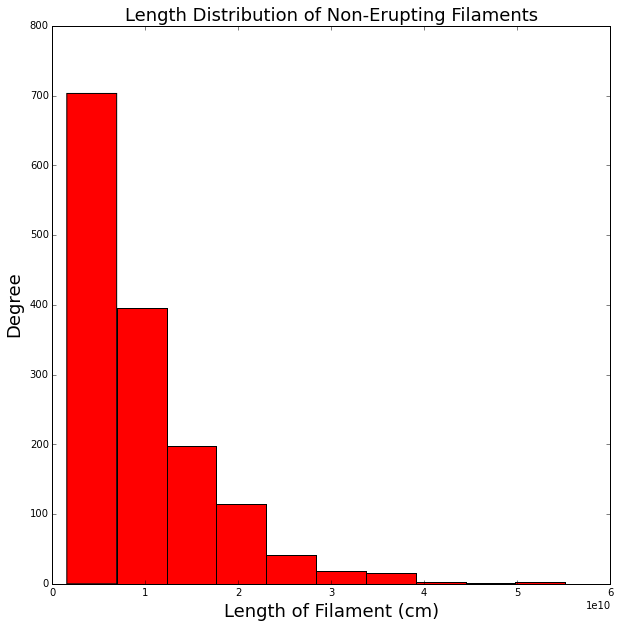

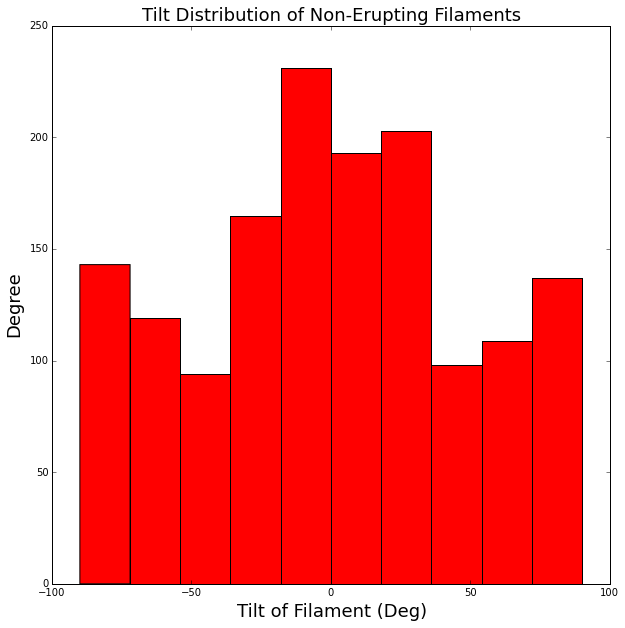

In [11]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.ylabel('Number of Non-Erupting Filaments',fontsize=18)
plt.xlabel('Length of Filament (cm)',fontsize=18)
all_tracks_trans['fi_length'].plot(kind='hist', rwidth=1.5, color = 'r')
plt.title('Length Distribution of Non-Erupting Filaments',fontsize=18)


    
plt.figure(figsize=(10,10))
plt.grid(True)
plt.ylabel('Number of Non-Erupting Filaments',fontsize=18)
plt.xlabel('Tilt of Filament (Deg)',fontsize=18)
all_tracks_trans['fi_tilt'].plot(kind='hist', rwidth=1.5, color = 'r')
plt.title('Tilt Distribution of Non-Erupting Filaments',fontsize=18)





In [12]:
#I am going to try my own method to find the slope of the length
#print len(all_tracks_trans)
grouped_filaments = all_tracks_trans.groupby('Track No.')
stuff = 0
time_delta = []

for name, group in grouped_filaments:
    #print name
    
    t = group['HEK_time']
    
    time = [pd.to_datetime(date) for date in t]
    t0 = time[0]
    for i in range(len(time)):
        t1 = time[i]
        time_delta.append(timedelta.total_seconds(t1 - t0))
        
#print time_delta       
print len(all_tracks_trans)
print len(time_delta)
all_tracks_trans['time_delta'] = time_delta
all_tracks_trans.head()

1492
1492


/Users/ashnaaggarwal/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,decay_index,time_delta
129,45,4520415700,2012-01-04 18:11:55,0,-81.6418,448.051993,1,-671.085022,584.557983,0.481482,0.663834,0
130,45,8610285600,2012-01-05 18:32:45,0,-70.9874,788.099448,2,-543.301025,571.471985,0.666666,0.511008,87650
131,45,7533991400,2012-01-06 18:05:45,1,14.4374,701.631317,2,-432.623993,643.906006,1.029412,0.157517,172430
132,45,2941852670,2012-01-07 09:33:12,0,-25.8508,316.826940,0,-336.035004,639.875000,1.333332,0.439077,228077
133,45,3444121090,2012-01-08 08:28:28,0,-33.1219,416.504564,3,-180.089005,648.922974,1.096153,-0.140527,310593


# TRYING TO TRUNCATE DATA FOR HALF THE TRACK LENGTH

In [13]:
temp_group = all_tracks_trans.groupby('Track No.')
temp_group = temp_group.apply(lambda  g: g[g['HEK_time'] < g['HEK_time'].iloc[np.ceil(len(g)/2.)]])
all_tracks_trans_filt = temp_group.reset_index(drop=True)
#print all_tracks_trans_filt

/Users/ashnaaggarwal/anaconda/lib/python2.7/site-packages/pandas/core/index.py:798: FutureWarning: scalar indexers for index type Int64Index should be integers and not floating point
  type(self).__name__),FutureWarning)


In [14]:
def plot_slopes(x,y,m,b,title,ytitle):
    line = [m*each+b for each in x] #Calculate the line points (y =mx+b)
    
    plt.plot(x, y, color='red', linestyle='-')
    plt.plot(x, line, '-.', color='blue')   ##plots the line fit
    #plt.title('Filament length (Track) of Non-Erupting Filament')
    plt.title(title)
    plt.grid(True)
    fig1 = plt.gcf()
    fig1.set_size_inches(10.5,10.5)
    plt.xlabel('Filament Track time')
    plt.ylabel(ytitle)
    #plt.ylabel('Filament length (cm)')
    plt.xticks( rotation= 80 )
    #plt.show()

# Find the change in Length for each filament

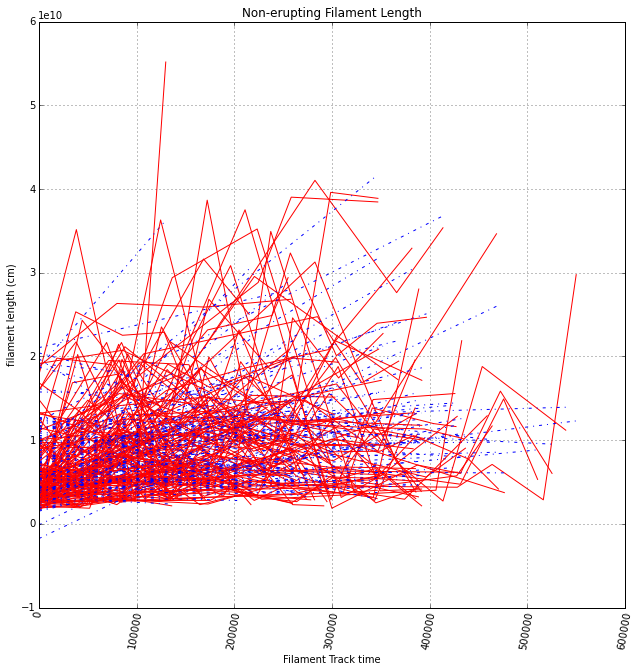

In [15]:
grouped_filaments = all_tracks_trans_filt.groupby('Track No.')
#temp_group = all_tracks_trans.groupby('Track No.')
#temp_group = temp_group.apply(lambda  g: g[g['HEK_time'] < g['HEK_time'].iloc[np.ceil(len(g)/2.)]])
len_slopes = []
avg_len = []
len_stdev = []
len_skew = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    f_len = group['fi_length']
    fit = np.polyfit(t_delt, f_len,1)
    len_slopes = len_slopes + [fit]*len(f_len) 
    avg_len.extend([f_len.mean()]*len(f_len))
    len_stdev.extend([np.std(f_len)]*len(f_len))
    len_skew.extend([stats.skew(f_len)]*len(f_len))
    plot_slopes(t_delt,f_len,fit[0],fit[1],'Non-erupting Filament Length','filament length (cm)')


In [16]:
len_slopes_only = [item[0] for item in len_slopes]

all_tracks_trans_filt['len_fits'] = len_slopes
all_tracks_trans_filt['len_slope'] = len_slopes_only
all_tracks_trans_filt['avg_len'] = avg_len
all_tracks_trans_filt['len_stdev'] = len_stdev
all_tracks_trans_filt['len_skew'] = len_skew
all_tracks_trans_filt.head()

,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,decay_index,time_delta,len_fits,len_slope,avg_len,len_stdev,len_skew
0,45,4520415700,2012-01-04 18:11:55,0,-81.6418,448.051993,1,-671.085022,584.557983,0.481482,0.663834,0,"[16168.8058092, 3780411483.61]",16168.805809,7564764370,6.168439e+09,1.640895
1,45,8610285600,2012-01-05 18:32:45,0,-70.9874,788.099448,2,-543.301025,571.471985,0.666666,0.511008,87650,"[16168.8058092, 3780411483.61]",16168.805809,7564764370,6.168439e+09,1.640895
2,45,7533991400,2012-01-06 18:05:45,1,14.4374,701.631317,2,-432.623993,643.906006,1.029412,0.157517,172430,"[16168.8058092, 3780411483.61]",16168.805809,7564764370,6.168439e+09,1.640895
3,45,2941852670,2012-01-07 09:33:12,0,-25.8508,316.826940,0,-336.035004,639.875000,1.333332,0.439077,228077,"[16168.8058092, 3780411483.61]",16168.805809,7564764370,6.168439e+09,1.640895
4,45,3444121090,2012-01-08 08:28:28,0,-33.1219,416.504564,3,-180.089005,648.922974,1.096153,-0.140527,310593,"[16168.8058092, 3780411483.61]",16168.805809,7564764370,6.168439e+09,1.640895


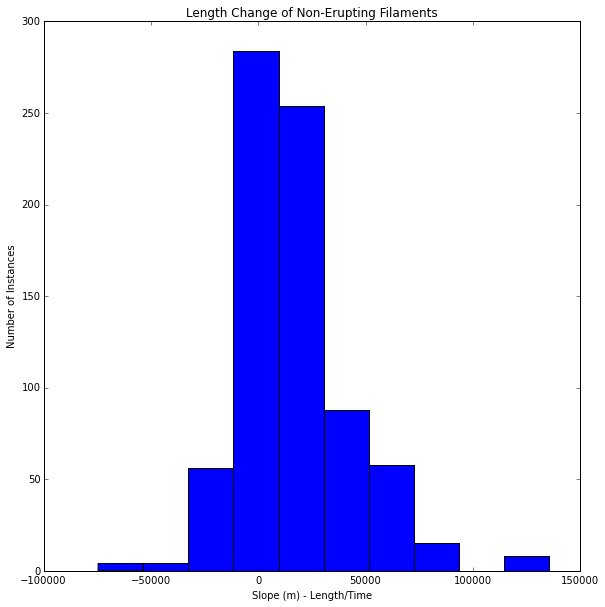

In [17]:
n_groups=5

plt.xlabel('Slope (m) - Length/Time')
plt.ylabel('Number of Instances')
plt.title('Length Change of Non-Erupting Filaments')
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
plt.hist(len_slopes_only)
plt.tight_layout()
plt.show()

# Decay index

#Find the Change in Area for each Filament

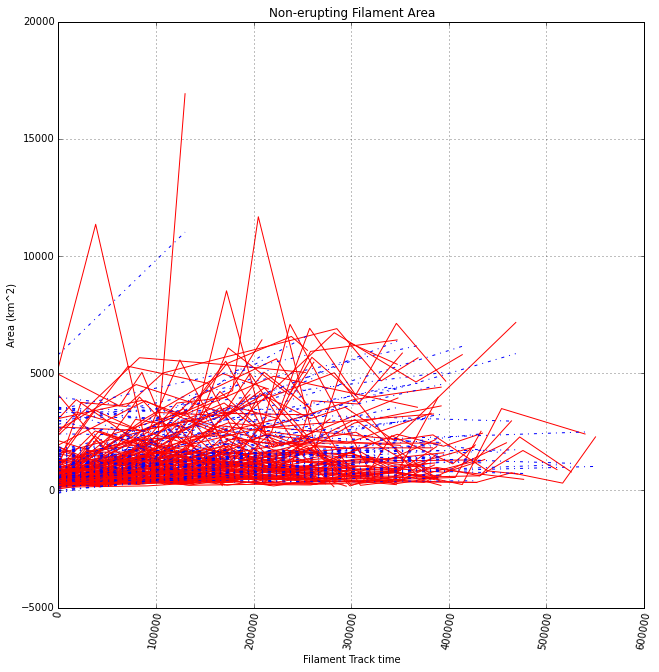

In [18]:
grouped_filaments = all_tracks_trans_filt.groupby('Track No.')
area_slopes = []
avg_area = []
area_stdev = []
area_skew = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    f_area = group['area']
    fit = np.polyfit(t_delt, f_area,1)
    area_slopes = area_slopes + [fit]*len(f_area) 
    avg_area.extend([f_area.mean()]*len(f_area))
    area_stdev.extend([np.std(f_area)]*len(f_area))
    area_skew.extend([stats.skew(f_area)]*len(f_area))
    plot_slopes(t_delt,f_area,fit[0],fit[1],'Non-erupting Filament Area', 'Area (km^2)')

In [19]:
area_slopes_only = [item[0] for item in area_slopes]
all_tracks_trans_filt['avg_area'] = avg_area
all_tracks_trans_filt['area_fits'] = area_slopes
all_tracks_trans_filt['area_slope'] = area_slopes_only
all_tracks_trans_filt['area_stdev'] = area_stdev
all_tracks_trans_filt['area_skew'] = area_skew
all_tracks_trans_filt.head()

,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,...,len_fits,len_slope,avg_len,len_stdev,len_skew,avg_area,area_fits,area_slope,area_stdev,area_skew
0,45,4520415700,2012-01-04 18:11:55,0,-81.6418,448.051993,1,-671.085022,584.557983,0.481482,...,"[16168.8058092, 3780411483.61]",16168.805809,7564764370,6.168439e+09,1.640895,820.900541,"[0.00234261038572, 272.606221583]",0.002343,711.119135,1.851593
1,45,8610285600,2012-01-05 18:32:45,0,-70.9874,788.099448,2,-543.301025,571.471985,0.666666,...,"[16168.8058092, 3780411483.61]",16168.805809,7564764370,6.168439e+09,1.640895,820.900541,"[0.00234261038572, 272.606221583]",0.002343,711.119135,1.851593
2,45,7533991400,2012-01-06 18:05:45,1,14.4374,701.631317,2,-432.623993,643.906006,1.029412,...,"[16168.8058092, 3780411483.61]",16168.805809,7564764370,6.168439e+09,1.640895,820.900541,"[0.00234261038572, 272.606221583]",0.002343,711.119135,1.851593
3,45,2941852670,2012-01-07 09:33:12,0,-25.8508,316.826940,0,-336.035004,639.875000,1.333332,...,"[16168.8058092, 3780411483.61]",16168.805809,7564764370,6.168439e+09,1.640895,820.900541,"[0.00234261038572, 272.606221583]",0.002343,711.119135,1.851593
4,45,3444121090,2012-01-08 08:28:28,0,-33.1219,416.504564,3,-180.089005,648.922974,1.096153,...,"[16168.8058092, 3780411483.61]",16168.805809,7564764370,6.168439e+09,1.640895,820.900541,"[0.00234261038572, 272.606221583]",0.002343,711.119135,1.851593


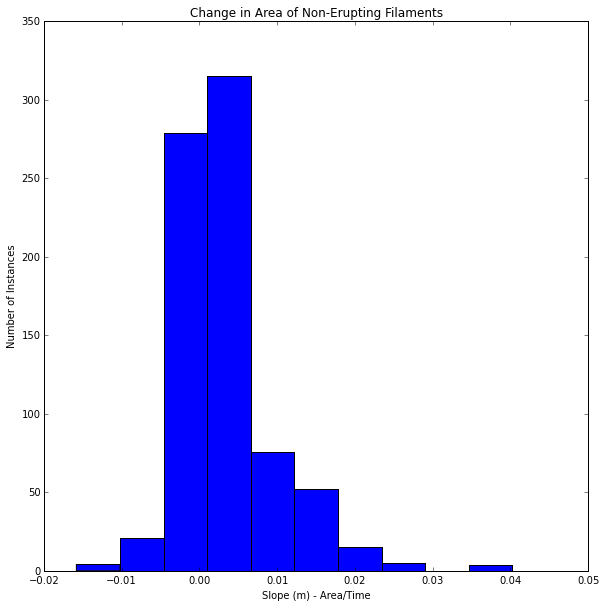

In [20]:
plt.xlabel('Slope (m) - Area/Time')
plt.ylabel('Number of Instances')
plt.title('Change in Area of Non-Erupting Filaments')
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
plt.hist(area_slopes_only)
plt.tight_layout()
plt.show()

In [21]:
print min(all_tracks_trans['fi_length'])

1578555900.0


#Find the length-to-width ratio

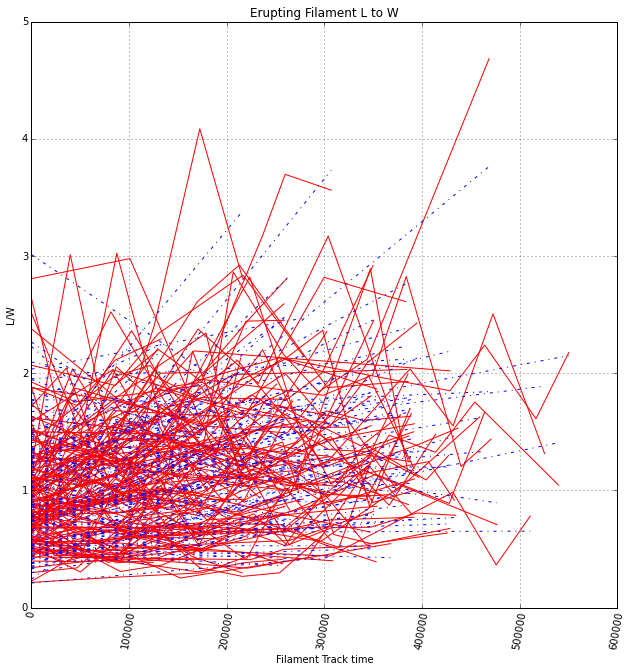

In [22]:
#The format of how I find the slope for each feature is the same
grouped_filaments = all_tracks_trans_filt.groupby('Track No.')
size_ratio_slopes = []
avg_size_ratio = []
size_ratio_stdev = []
size_ratio_skew = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    f_size_ratio = group['L_to_W']
    fit = np.polyfit(t_delt, f_size_ratio,1)
    size_ratio_slopes = size_ratio_slopes + [fit]*len(f_size_ratio) 
    avg_size_ratio.extend([f_size_ratio.mean()]*len(f_size_ratio))
    size_ratio_stdev.extend([np.std(f_size_ratio)]*len(f_size_ratio))
    size_ratio_skew.extend([stats.skew(f_size_ratio)]*len(f_size_ratio))
    plot_slopes(t_delt,f_size_ratio,fit[0],fit[1],'Erupting Filament L to W', 'L/W')

In [23]:
#Add the area information to the dataframe
size_ratio_slopes_only = [item[0] for item in size_ratio_slopes]
all_tracks_trans_filt['avg_L_to_W'] = avg_size_ratio
all_tracks_trans_filt['L_to_W_slope'] = size_ratio_slopes_only
all_tracks_trans_filt['L_to_W_stdev'] = size_ratio_stdev
all_tracks_trans_filt['L_to_W_skew'] = size_ratio_skew
all_tracks_trans_filt.head()

,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,...,len_skew,avg_area,area_fits,area_slope,area_stdev,area_skew,avg_L_to_W,L_to_W_slope,L_to_W_stdev,L_to_W_skew
0,45,4520415700,2012-01-04 18:11:55,0,-81.6418,448.051993,1,-671.085022,584.557983,0.481482,...,1.640895,820.900541,"[0.00234261038572, 272.606221583]",0.002343,711.119135,1.851593,0.966848,0.000001,0.283041,-0.430376
1,45,8610285600,2012-01-05 18:32:45,0,-70.9874,788.099448,2,-543.301025,571.471985,0.666666,...,1.640895,820.900541,"[0.00234261038572, 272.606221583]",0.002343,711.119135,1.851593,0.966848,0.000001,0.283041,-0.430376
2,45,7533991400,2012-01-06 18:05:45,1,14.4374,701.631317,2,-432.623993,643.906006,1.029412,...,1.640895,820.900541,"[0.00234261038572, 272.606221583]",0.002343,711.119135,1.851593,0.966848,0.000001,0.283041,-0.430376
3,45,2941852670,2012-01-07 09:33:12,0,-25.8508,316.826940,0,-336.035004,639.875000,1.333332,...,1.640895,820.900541,"[0.00234261038572, 272.606221583]",0.002343,711.119135,1.851593,0.966848,0.000001,0.283041,-0.430376
4,45,3444121090,2012-01-08 08:28:28,0,-33.1219,416.504564,3,-180.089005,648.922974,1.096153,...,1.640895,820.900541,"[0.00234261038572, 272.606221583]",0.002343,711.119135,1.851593,0.966848,0.000001,0.283041,-0.430376


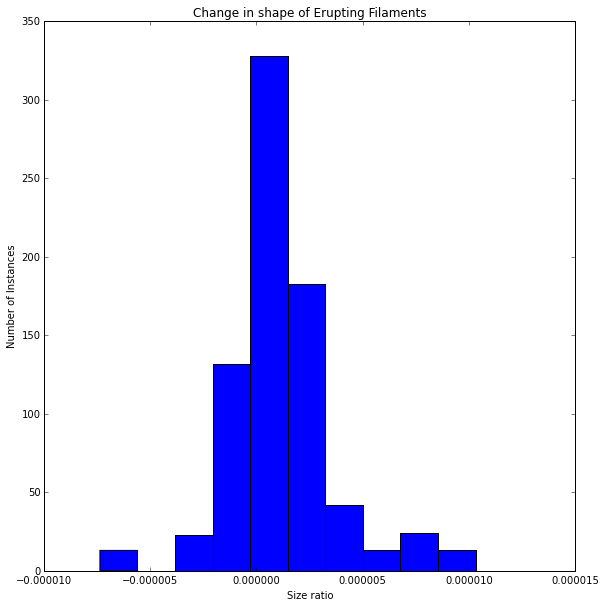

In [24]:
plt.xlabel('Size ratio')
plt.ylabel('Number of Instances')
plt.title('Change in shape of Erupting Filaments')
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
plt.hist(size_ratio_slopes_only)
plt.tight_layout()
plt.show()

#Number of Barbs

#barbs = all_tracks_trans['fi_barbstot']
plt.xlabel('Number of Barbs')
plt.ylabel('Number of Instances')
plt.title('Number of barbs in the filament')
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
#plt.hist(barbs)
plt.tight_layout()
all_tracks_trans['fi_barbstot'].plot(kind='hist', rwidth=1.5, color = 'g')

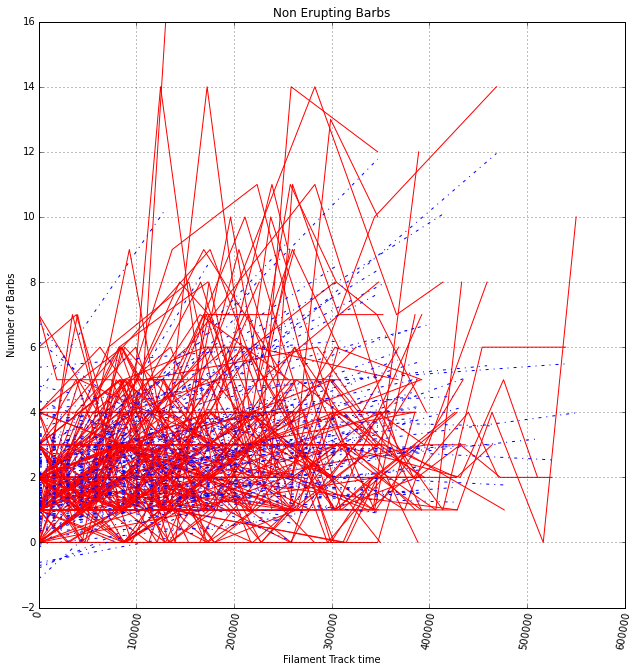

In [25]:
grouped_filaments = all_tracks_trans_filt.groupby('Track No.')
avg_barbs = []
barb_slope = []
barbs_stdev = []
barbs_skew = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    barbstot = group['fi_barbstot']
    fit = np.polyfit(t_delt, barbstot,1)
    barb_slope = barb_slope + [fit]*len(barbstot) 
    avg_barbs.extend([barbstot.mean()]*len(barbstot))
    barbs_stdev.extend([np.std(barbstot)]*len(barbstot))
    barbs_skew.extend([stats.skew(barbstot)]*len(barbstot))
    plot_slopes(t_delt,barbstot,fit[0],fit[1], 'Non Erupting Barbs', 'Number of Barbs')
    
barb_slopes_only = [item[0] for item in barb_slope]

In [26]:
print len(avg_barbs)
print len(barb_slope)
all_tracks_trans_filt['avg_barbs'] = avg_barbs
all_tracks_trans_filt['barb_slope'] = barb_slopes_only
all_tracks_trans_filt['barb_stdev'] = barbs_stdev
all_tracks_trans_filt['barb_skew'] = barbs_skew
all_tracks_trans_filt.head()

771
771


,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,...,area_stdev,area_skew,avg_L_to_W,L_to_W_slope,L_to_W_stdev,L_to_W_skew,avg_barbs,barb_slope,barb_stdev,barb_skew
0,45,4520415700,2012-01-04 18:11:55,0,-81.6418,448.051993,1,-671.085022,584.557983,0.481482,...,711.119135,1.851593,0.966848,0.000001,0.283041,-0.430376,2.428571,0.000009,2.441144,1.500692
1,45,8610285600,2012-01-05 18:32:45,0,-70.9874,788.099448,2,-543.301025,571.471985,0.666666,...,711.119135,1.851593,0.966848,0.000001,0.283041,-0.430376,2.428571,0.000009,2.441144,1.500692
2,45,7533991400,2012-01-06 18:05:45,1,14.4374,701.631317,2,-432.623993,643.906006,1.029412,...,711.119135,1.851593,0.966848,0.000001,0.283041,-0.430376,2.428571,0.000009,2.441144,1.500692
3,45,2941852670,2012-01-07 09:33:12,0,-25.8508,316.826940,0,-336.035004,639.875000,1.333332,...,711.119135,1.851593,0.966848,0.000001,0.283041,-0.430376,2.428571,0.000009,2.441144,1.500692
4,45,3444121090,2012-01-08 08:28:28,0,-33.1219,416.504564,3,-180.089005,648.922974,1.096153,...,711.119135,1.851593,0.966848,0.000001,0.283041,-0.430376,2.428571,0.000009,2.441144,1.500692


In [27]:
print min(barb_slopes_only)*10e5
print max(barb_slopes_only)*10e5
print min(avg_barbs)
print max(avg_barbs)

-40.9086195027
49.2509496499
0.333333333333
7.5


#Find the Change in Tilt for each Filament

In [28]:
print min(all_tracks_trans_filt['fi_tilt'])
print max(all_tracks_trans_filt['fi_tilt'])

-89.9479
90.0


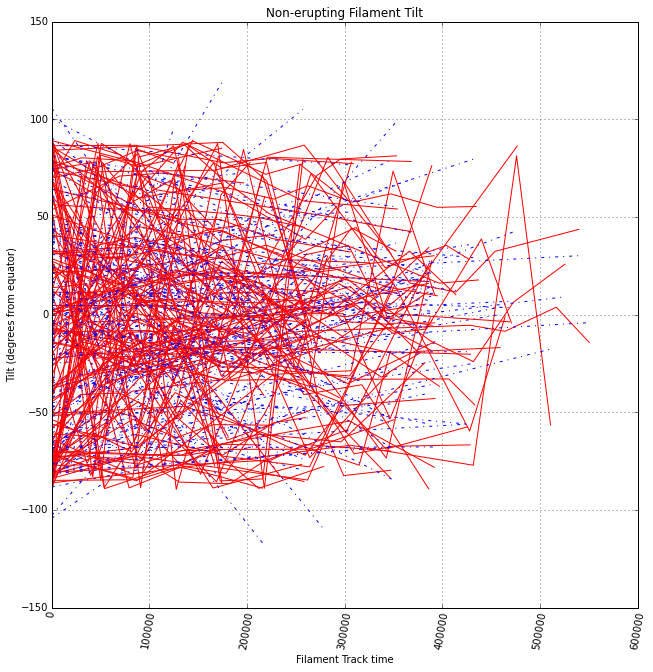

In [29]:
grouped_filaments = all_tracks_trans_filt.groupby('Track No.')
tilt_slope = []
avg_tilt = []
tilt_stdev = []
tilt_skew = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    f_tilt = group['fi_tilt']
    fit = np.polyfit(t_delt, f_tilt,1)
    tilt_slope = tilt_slope + [fit]*len(f_tilt)  
    avg_tilt.extend([f_tilt.mean()]*len(f_tilt))
    tilt_stdev.extend([np.std(f_tilt)]*len(f_tilt))
    tilt_skew.extend([stats.skew(f_tilt)]*len(f_tilt))
    plot_slopes(t_delt,f_tilt,fit[0],fit[1],'Non-erupting Filament Tilt','Tilt (degrees from equator)')
       
tilt_slopes_only = [item[0] for item in tilt_slope]

In [30]:
all_tracks_trans_filt['avg_tilt'] = avg_tilt
all_tracks_trans_filt['tilt_slope'] = tilt_slopes_only
all_tracks_trans_filt['tilt_stdev'] = tilt_stdev
all_tracks_trans_filt['tilt_skew'] = tilt_skew
all_tracks_trans_filt.head()

,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,...,L_to_W_stdev,L_to_W_skew,avg_barbs,barb_slope,barb_stdev,barb_skew,avg_tilt,tilt_slope,tilt_stdev,tilt_skew
0,45,4520415700,2012-01-04 18:11:55,0,-81.6418,448.051993,1,-671.085022,584.557983,0.481482,...,0.283041,-0.430376,2.428571,0.000009,2.441144,1.500692,-39.475529,0.000073,29.256562,0.303481
1,45,8610285600,2012-01-05 18:32:45,0,-70.9874,788.099448,2,-543.301025,571.471985,0.666666,...,0.283041,-0.430376,2.428571,0.000009,2.441144,1.500692,-39.475529,0.000073,29.256562,0.303481
2,45,7533991400,2012-01-06 18:05:45,1,14.4374,701.631317,2,-432.623993,643.906006,1.029412,...,0.283041,-0.430376,2.428571,0.000009,2.441144,1.500692,-39.475529,0.000073,29.256562,0.303481
3,45,2941852670,2012-01-07 09:33:12,0,-25.8508,316.826940,0,-336.035004,639.875000,1.333332,...,0.283041,-0.430376,2.428571,0.000009,2.441144,1.500692,-39.475529,0.000073,29.256562,0.303481
4,45,3444121090,2012-01-08 08:28:28,0,-33.1219,416.504564,3,-180.089005,648.922974,1.096153,...,0.283041,-0.430376,2.428571,0.000009,2.441144,1.500692,-39.475529,0.000073,29.256562,0.303481


In [31]:
#north_filaments = all_tracks_trans[all_tracks_trans_filt['ycen']>=0]
#south_filaments = all_tracks_trans[all_tracks_trans_filt['ycen']<0]
#print len(north_filaments)
#print len(south_filaments)
#barbs = all_tracks_trans['fi_barbstot']
#plt.xlabel('Avg tilt')
#plt.ylabel('Number of Instances')
#plt.xlim([0,90])
#plt.title('Tilt of Northern filaments')
#fig1 = plt.gcf()
#fig1.set_size_inches(8.5,8.5)
#plt.hist(barbs)
#plt.tight_layout()
#abs(north_filaments['avg_tilt']).plot(kind='hist', rwidth=1.5, color = 'b', alpha=0.5)
#abs(south_filaments['avg_tilt']).plot(kind='hist', rwidth=1.5, color = 'r', alpha=0.5)

# Let's look at the Chirality

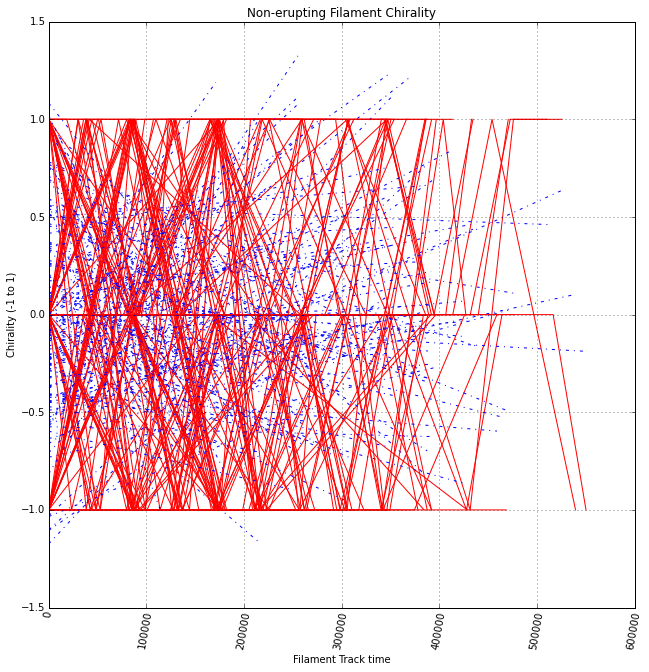

In [32]:
grouped_filaments = all_tracks_trans_filt.groupby('Track No.')
chiral_slope = []
avg_chiral = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    f_chiral = group['fi_chirality']
    fit = np.polyfit(t_delt, f_chiral,1)
    chiral_slope = chiral_slope + [fit]*len(f_chiral)  
    avg_chiral.extend([f_chiral.mean()]*len(f_chiral))
    plot_slopes(t_delt,f_chiral,fit[0],fit[1],'Non-erupting Filament Chirality','Chirality (-1 to 1)')
       
chiral_slopes_only = [item[0] for item in chiral_slope]

In [33]:
all_tracks_trans_filt['avg_chirality'] = avg_chiral
all_tracks_trans_filt['chirality_slope'] = chiral_slopes_only
all_tracks_trans_filt.head()

,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,...,avg_barbs,barb_slope,barb_stdev,barb_skew,avg_tilt,tilt_slope,tilt_stdev,tilt_skew,avg_chirality,chirality_slope
0,45,4520415700,2012-01-04 18:11:55,0,-81.6418,448.051993,1,-671.085022,584.557983,0.481482,...,2.428571,0.000009,2.441144,1.500692,-39.475529,0.000073,29.256562,0.303481,0.285714,8.844525e-07
1,45,8610285600,2012-01-05 18:32:45,0,-70.9874,788.099448,2,-543.301025,571.471985,0.666666,...,2.428571,0.000009,2.441144,1.500692,-39.475529,0.000073,29.256562,0.303481,0.285714,8.844525e-07
2,45,7533991400,2012-01-06 18:05:45,1,14.4374,701.631317,2,-432.623993,643.906006,1.029412,...,2.428571,0.000009,2.441144,1.500692,-39.475529,0.000073,29.256562,0.303481,0.285714,8.844525e-07
3,45,2941852670,2012-01-07 09:33:12,0,-25.8508,316.826940,0,-336.035004,639.875000,1.333332,...,2.428571,0.000009,2.441144,1.500692,-39.475529,0.000073,29.256562,0.303481,0.285714,8.844525e-07
4,45,3444121090,2012-01-08 08:28:28,0,-33.1219,416.504564,3,-180.089005,648.922974,1.096153,...,2.428571,0.000009,2.441144,1.500692,-39.475529,0.000073,29.256562,0.303481,0.285714,8.844525e-07


# Adding Decay Index Information

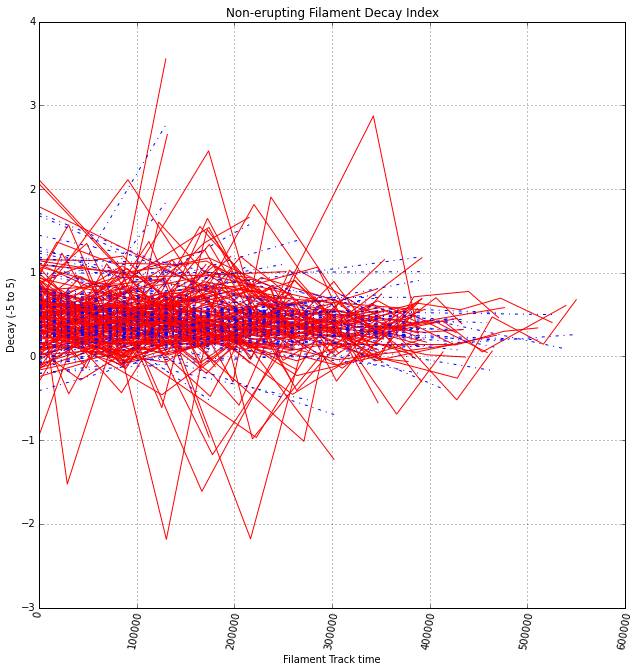

In [34]:
grouped_filaments = all_tracks_trans_filt.groupby('Track No.')
decay_slope = []
avg_decay = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    f_decay = group['decay_index']
    fit = np.polyfit(t_delt, f_decay,1)
    decay_slope = decay_slope + [fit]*len(f_decay)  
    avg_decay.extend([f_decay.mean()]*len(f_decay))
    plot_slopes(t_delt,f_decay,fit[0],fit[1],'Non-erupting Filament Decay Index','Decay (-5 to 5)')
       
decay_slopes_only = [item[0] for item in decay_slope]

In [35]:
all_tracks_trans_filt['avg_decay_index'] = avg_decay
all_tracks_trans_filt['decay_index_slope'] = decay_slopes_only
all_tracks_trans_filt.head()

,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,...,barb_stdev,barb_skew,avg_tilt,tilt_slope,tilt_stdev,tilt_skew,avg_chirality,chirality_slope,avg_decay_index,decay_index_slope
0,45,4520415700,2012-01-04 18:11:55,0,-81.6418,448.051993,1,-671.085022,584.557983,0.481482,...,2.441144,1.500692,-39.475529,0.000073,29.256562,0.303481,0.285714,8.844525e-07,0.389038,-3.508191e-07
1,45,8610285600,2012-01-05 18:32:45,0,-70.9874,788.099448,2,-543.301025,571.471985,0.666666,...,2.441144,1.500692,-39.475529,0.000073,29.256562,0.303481,0.285714,8.844525e-07,0.389038,-3.508191e-07
2,45,7533991400,2012-01-06 18:05:45,1,14.4374,701.631317,2,-432.623993,643.906006,1.029412,...,2.441144,1.500692,-39.475529,0.000073,29.256562,0.303481,0.285714,8.844525e-07,0.389038,-3.508191e-07
3,45,2941852670,2012-01-07 09:33:12,0,-25.8508,316.826940,0,-336.035004,639.875000,1.333332,...,2.441144,1.500692,-39.475529,0.000073,29.256562,0.303481,0.285714,8.844525e-07,0.389038,-3.508191e-07
4,45,3444121090,2012-01-08 08:28:28,0,-33.1219,416.504564,3,-180.089005,648.922974,1.096153,...,2.441144,1.500692,-39.475529,0.000073,29.256562,0.303481,0.285714,8.844525e-07,0.389038,-3.508191e-07


#Add the average X and Y locations to the mix

In [65]:
grouped_filaments = all_tracks_trans_filt.groupby('Track No.')
avg_x = []
avg_y = []
for name, group in grouped_filaments:
    f_xloc = group['xcen']
    f_yloc = group['ycen'] 
    avg_x.extend([f_xloc.mean()]*len(f_xloc))
    avg_y.extend([f_yloc.mean()]*len(f_yloc))
all_tracks_trans_filt['avg_xcen'] = avg_x
all_tracks_trans_filt['avg_ycen'] = avg_y
#all_tracks_trans_filt.head()
all_tracks_trans_filt['solar_region'] = np.where(abs(all_tracks_trans_filt['avg_ycen'])>=750, 1.0, 0.0)
for item in all_tracks_trans_filt['solar_region']:
    if item == 1.0:
        print item

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [66]:
all_tracks_trans_filt.keys()

Index([u'Track No.', u'fi_length', u'HEK_time', u'fi_chirality', u'fi_tilt',
       u'area', u'fi_barbstot', u'xcen', u'ycen', u'L_to_W', u'decay_index',
       u'time_delta', u'len_fits', u'len_slope', u'avg_len', u'len_stdev',
       u'len_skew', u'avg_area', u'area_fits', u'area_slope', u'area_stdev',
       u'area_skew', u'avg_L_to_W', u'L_to_W_slope', u'L_to_W_stdev',
       u'L_to_W_skew', u'avg_barbs', u'barb_slope', u'barb_stdev',
       u'barb_skew', u'avg_tilt', u'tilt_slope', u'tilt_stdev', u'tilt_skew',
       u'avg_chirality', u'chirality_slope', u'avg_decay_index',
       u'decay_index_slope', u'avg_xcen', u'avg_ycen', u'solar_region'],
      dtype='object')

In [67]:
short_list = grouped_filaments.first()
short_list.reset_index(inplace=1) #Inplace keeps Track No. as a column, rather than setting it as an index
short_list.head()

,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,...,tilt_slope,tilt_stdev,tilt_skew,avg_chirality,chirality_slope,avg_decay_index,decay_index_slope,avg_xcen,avg_ycen,solar_region
0,45,4520415700,2012-01-04 18:11:55,0,-81.64180,448.051993,1,-671.085022,584.557983,0.481482,...,0.000073,29.256562,0.303481,0.285714,8.844525e-07,0.389038,-3.508191e-07,-289.185742,617.737139,0
1,68,2941852670,2012-01-07 09:33:12,0,-67.14550,309.766491,1,-715.331970,590.575989,0.754385,...,0.000096,42.193052,0.837694,-0.250000,-1.263602e-06,0.248660,-1.917935e-06,-512.194496,677.675873,0
2,146,2654843390,2012-01-16 08:25:38,0,-17.46530,374.726812,1,-21.120400,-495.825989,1.421051,...,0.000125,13.604218,-1.222649,0.400000,-2.497545e-06,0.415952,3.377362e-08,242.954122,-508.451807,0
3,160,5453194800,2012-01-17 18:08:23,0,1.90872,369.666719,0,-834.679993,370.075012,2.378381,...,-0.000021,10.083356,0.188663,-0.400000,-2.342418e-06,0.435682,7.814257e-08,-591.248004,386.710205,0
4,197,9830094800,2012-01-19 17:47:27,1,30.97470,1748.112001,3,-799.367981,474.593994,1.465910,...,-0.000026,6.532800,0.567651,0.500000,-1.934729e-06,0.255780,-5.468490e-08,-607.254323,476.535838,0


In [68]:
short_list.to_csv('Non_Eruption_Analysis_Updated.csv', columns = ('Track No.', 'avg_len', 'len_slope', 'len_stdev','len_skew','avg_area', 'area_slope', 'avg_chirality','area_stdev','area_skew', 'chirality_slope', 'avg_decay_index', 'decay_index_slope', 'avg_barbs', 'barb_slope','barb_stdev','barb_skew','avg_tilt', 'tilt_slope','tilt_stdev','tilt_skew','avg_xcen','avg_ycen','avg_L_to_W','L_to_W_slope','L_to_W_stdev','L_to_W_skew', 'solar_region'))

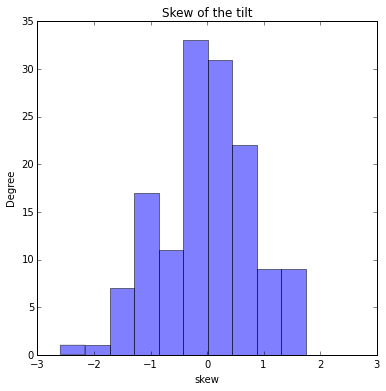

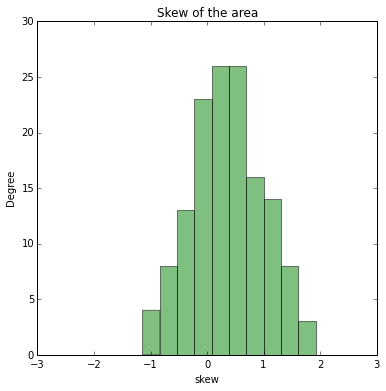

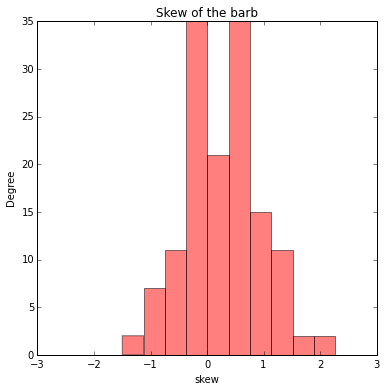

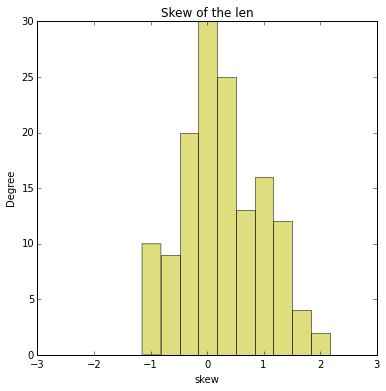

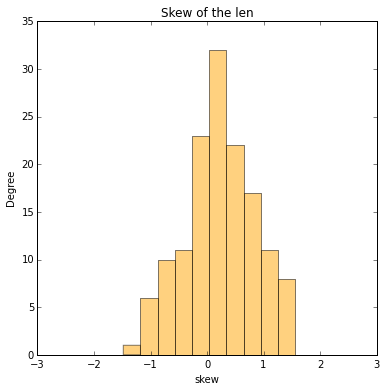

In [40]:
def plot_skew(param_list, color, param):
    plt.xlabel('skew')
    plt.ylabel('Number of Instances')
    plt.xlim([-3,3])
    plt.title('Skew of the %s' % param)
    fig1 = plt.gcf()
    fig1.set_size_inches(5.5,5.5)
    plt.tight_layout()
    param_list.plot(kind='hist',rwidth=1.5, color = color, alpha=0.5)
    plt.show()


plot_skew(short_list['tilt_skew'],color='b', param='tilt')
plot_skew(short_list['area_skew'],color='g', param='area')
plot_skew(short_list['barb_skew'],color='r', param='barb')
plot_skew(short_list['len_skew'],color='y', param='len')
plot_skew(short_list['L_to_W_skew'],color='orange', param='len')

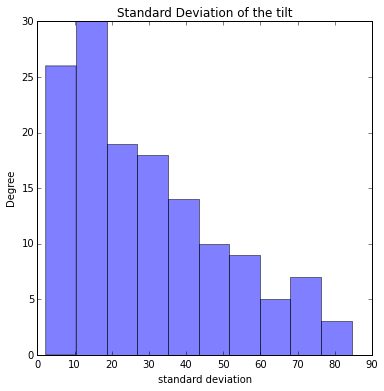

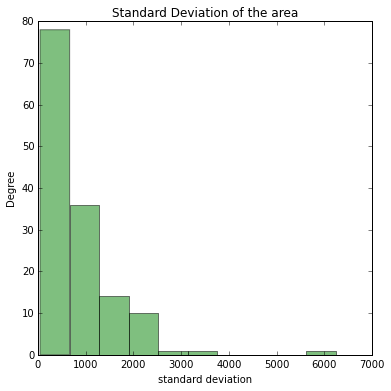

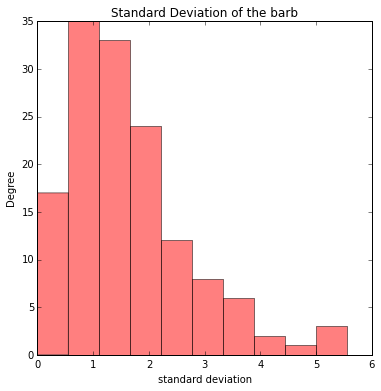

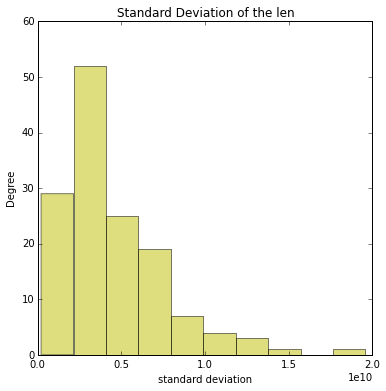

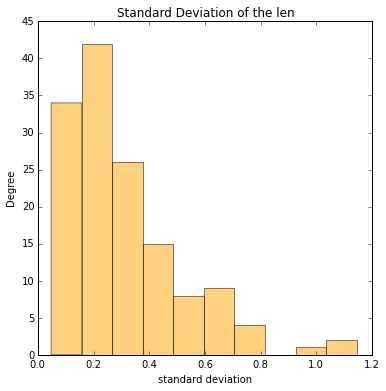

In [41]:
def plot_stdev(param_list, color, param):
    plt.xlabel('standard deviation')
    plt.ylabel('Number of Instances')
    #plt.xlim([-3,3])
    plt.title('Standard Deviation of the %s' % param)
    fig1 = plt.gcf()
    fig1.set_size_inches(5.5,5.5)
    plt.tight_layout()
    param_list.plot(kind='hist',rwidth=1.5, color = color, alpha=0.5)
    plt.show()


plot_stdev(short_list['tilt_stdev'],color='b', param='tilt')
plot_stdev(short_list['area_stdev'],color='g', param='area')
plot_stdev(short_list['barb_stdev'],color='r', param='barb')
plot_stdev(short_list['len_stdev'],color='y', param='len')
plot_stdev(short_list['L_to_W_stdev'],color='orange', param='len')

#CURRENT RESULTS FOR HACK WEEK

In [42]:
url = 'Non_Eruption_Analysis.csv'
non_erupting = pd.read_csv(url)
non_erupting = non_erupting.drop('Unnamed: 0', axis=1)
non_erupting.replace('Na',np.nan, inplace=True)
non_erupting['Eruption'] = 0
non_erupting.head()
#non_erupting.keys()


,Track No.,fi_length_avg,length_slp,fi_area_avg,area_slp,fi_chiral_avg,chiral_slp,fi_tilt_avg,tilt_slp,Eruption
0,64,1.910054e+10,-20851.523458,4899.559437,-0.017645,0.400000,-0.259382,46.965340,-3.110127,0
1,78,9.040830e+09,19070.132868,1100.649604,0.001371,-0.333333,-0.836622,-33.939233,0.316939,0
2,98,6.642232e+09,5826.291102,1461.183990,-0.000051,0.285714,0.864459,2.343557,-1.330016,0
3,106,1.047587e+10,19895.431452,1288.497093,0.003803,0.222222,0.832329,-21.837421,0.671030,0
4,135,4.836125e+09,-14971.593714,353.247685,-0.001294,-0.200000,2.301987,-37.236174,0.481864,0


In [43]:
url = 'Eruption_Analysis.csv'

erupting = pd.read_csv(url)
erupting = erupting.drop('Unnamed: 0', axis=1)
erupting.replace('Na',np.nan, inplace=True)
erupting = erupting.astype(float)
erupting['Eruption'] = 1
erupting = erupting.dropna()
erupting.head()

,Track No.,fi_length_avg,length_slp,fi_area_avg,area_slp,fi_chiral_avg,chiral_slp,fi_tilt_avg,tilt_slp,Eruption
1,21,4.843297e+09,14271.123747,476.062630,-0.002162,0.000000,0.000000,-55.760900,-6.176173,1
3,93,1.140865e+10,5635.917614,4542.134217,-0.004866,0.000000,4.706329,-9.283704,-4.488977,1
4,94,2.242780e+10,-26760.784806,5584.925487,-0.007008,-0.142857,-3.257830,33.833814,-0.721631,1
5,140,1.219793e+10,100417.840826,3487.984499,0.029020,0.250000,0.242555,17.280300,4.510884,1
6,175,1.381954e+10,12941.709122,5210.939558,0.007604,0.400000,-1.354914,-22.194140,-0.169296,1


In [44]:
##Now lets see if we can predict whether a filament will erupt or not. 
erupting = erupting.astype(float)
all_eruptions=erupting.append(non_erupting,ignore_index = True)   #adding everything together
all_eruptions = all_eruptions.dropna() #for now, dropping everything with NaN
all_eruptions.head()

,Track No.,fi_length_avg,length_slp,fi_area_avg,area_slp,fi_chiral_avg,chiral_slp,fi_tilt_avg,tilt_slp,Eruption
0,21,4.843297e+09,14271.123747,476.062630,-0.002162,0.000000,0.000000,-55.760900,-6.176173,1
1,93,1.140865e+10,5635.917614,4542.134217,-0.004866,0.000000,4.706329,-9.283704,-4.488977,1
2,94,2.242780e+10,-26760.784806,5584.925487,-0.007008,-0.142857,-3.257830,33.833814,-0.721631,1
3,140,1.219793e+10,100417.840826,3487.984499,0.029020,0.250000,0.242555,17.280300,4.510884,1
4,175,1.381954e+10,12941.709122,5210.939558,0.007604,0.400000,-1.354914,-22.194140,-0.169296,1


In [45]:
#Pull out the feature we want to predict (1 for eruption, 0 for no eruption)
Y = np.array(all_eruptions['Eruption'])  #getting the eruption status (variable that is trying to be predicted)

In [46]:
all_eruptions.to_csv('All_Eruption_Analysis.csv', columns = ('Track No.', 'fi_length_avg', 'length_slp', 'fi_area_avg', 'area_slp', 'fi_chiral_avg', 'chiral_slp', 'fi_tilt_avg', 'tilt_slp','Eruption'))
all_eruptions = all_eruptions.drop('Eruption',1)  #now dropping the eruption column! 
X = all_eruptions.as_matrix()
print X

[[  2.10000000e+01   4.84329692e+09   1.42711237e+04 ...,   0.00000000e+00
   -5.57609000e+01  -6.17617259e+00]
 [  9.30000000e+01   1.14086501e+10   5.63591761e+03 ...,   4.70632930e+00
   -9.28370400e+00  -4.48897738e+00]
 [  9.40000000e+01   2.24278048e+10  -2.67607848e+04 ...,  -3.25783011e+00
    3.38338143e+01  -7.21630702e-01]
 ..., 
 [  3.20600000e+03   1.60905280e+10   5.88893952e+04 ...,  -5.78335796e+00
   -5.52171750e+01   1.54167976e+00]
 [  3.21400000e+03   3.80288667e+09   1.22756346e+04 ...,   4.68376818e+00
    5.12343750e+01   1.70282370e+00]
 [  3.23200000e+03   3.80288486e+09  -2.78869390e+03 ...,   7.78335829e+00
   -1.17732250e+01   8.41856134e-01]]


In [47]:
#Let's start by making 40 different 'forests' (based on decision trees)
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

n_trees = range(1,41)
scores = []
#This will make 40 forests, and each forest will be made up of 1-40 trees successively
#This way, we can see how much of an effect adding more trees has on the predictions.
for i in n_trees:
    forest = sklearn.ensemble.RandomForestClassifier(n_estimators = i)
    val_score = cross_val_score(forest, X=X, y=Y, cv=10)
    scores.append(val_score) 

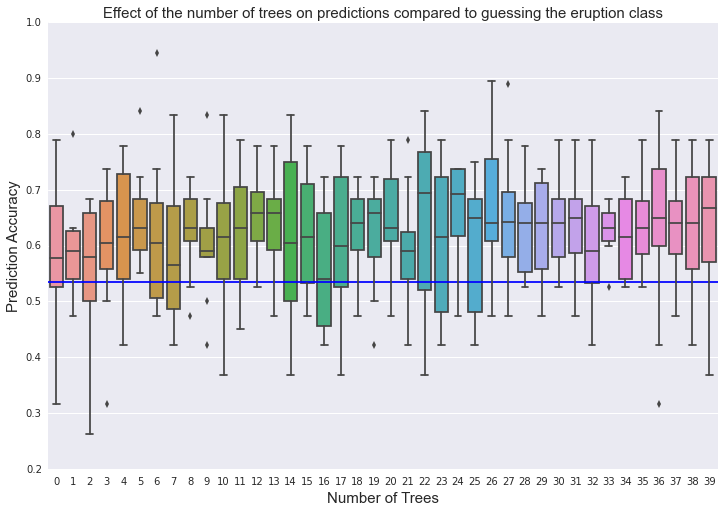

In [48]:
import seaborn as sns
non_erupt = 0.
for eruption in Y:
    if eruption == 0:
        non_erupt = non_erupt+1.
avg = non_erupt/len(Y)

plt.figure(figsize=(12,8))
plt.axhline(y=avg)
plt.title('Effect of the number of trees on predictions compared to guessing the eruption class', fontsize=15)
plt.xlabel('Number of Trees', fontsize=15)
plt.ylabel('Prediction Accuracy', fontsize=15)
sns.boxplot(data=scores)
#sns.boxplot(scores)

In [49]:
feature_forest = sklearn.ensemble.RandomForestClassifier(n_estimators = 15)
#by_feature = feature_forest.feature_importances_
fitted_forest4a = forest.fit(X, Y)
val_score_ = cross_val_score(fitted_forest4a, X=X, y=Y, cv=10)
imp_features = fitted_forest4a.feature_importances_

print imp_features

[ 0.07929793  0.09436795  0.16504898  0.0802108   0.1640701   0.07454388
  0.10255865  0.11369305  0.12620866]


[ 0.09909007  0.08543095  0.19848742  0.09958838  0.13182303  0.0677992
  0.06645048  0.12320419  0.12812628]
Index([u'Track No.', u'fi_length_avg', u'length_slp', u'fi_area_avg',
       u'area_slp', u'fi_chiral_avg', u'chiral_slp', u'fi_tilt_avg',
       u'tilt_slp'],
      dtype='object')


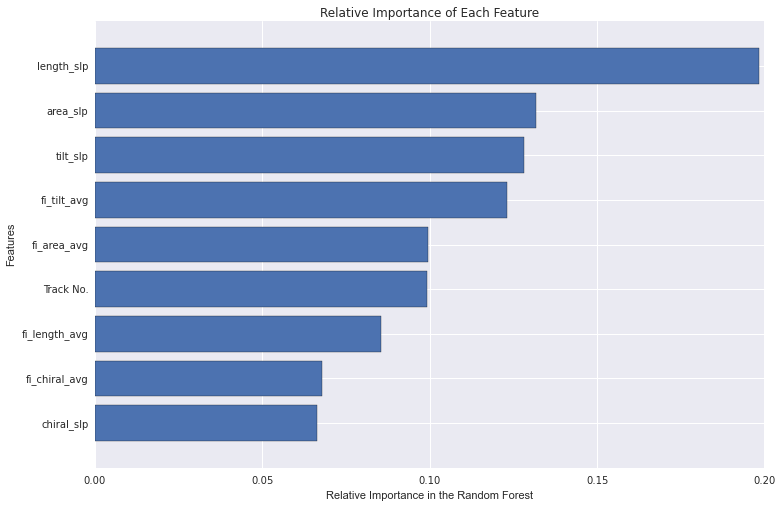

In [50]:
#Whitch features are most useful for prediction?

plt.figure(figsize=(12,8))
clf = RandomForestClassifier(n_estimators=15)

clf.fit(X,Y)
importance_list = clf.feature_importances_
name_list = all_eruptions.columns
print importance_list
print name_list
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative Importance of Each Feature')
plt.show()

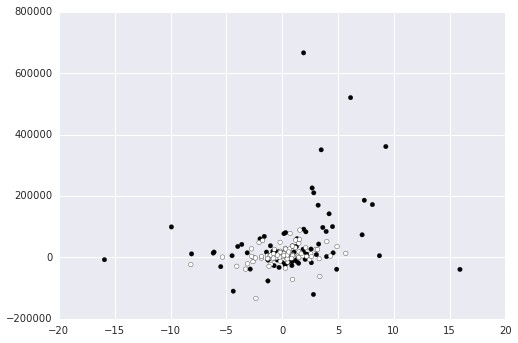

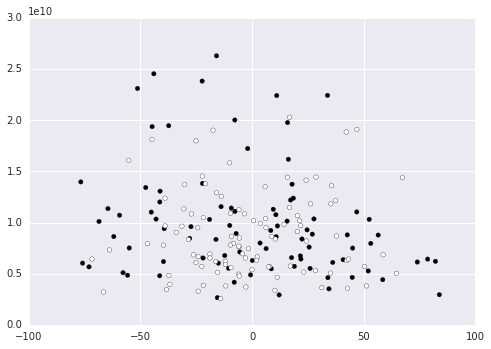

In [51]:
colors = Y
plt.scatter(all_eruptions['tilt_slp'],all_eruptions['length_slp'], c=colors)
plt.show()
plt.scatter(all_eruptions['fi_tilt_avg'],all_eruptions['fi_length_avg'], c=colors)
plt.show()

In [52]:
print len(short_list)

141
